In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [86]:
movies_df = pd.read_csv("movies.csv")

In [87]:
print(movies_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [88]:
# Load the dataset
movies = pd.read_csv("movies.csv")

# Drop unnecessary columns
movies.drop(["show_id", "director", "cast", "date_added", "duration", "description"], axis=1, inplace=True)

# Drop rows with missing values
movies.dropna(inplace=True)

# Remove whitespace and convert all strings to lowercase
movies["title"] = movies["title"].str.strip().str.lower()
movies["country"] = movies["country"].str.strip().str.lower()
movies["listed_in"] = movies["listed_in"].str.strip().str.lower()

# Convert release_year column to integer
movies["release_year"] = movies["release_year"].astype(int)

# Remove any duplicates
movies.drop_duplicates(inplace=True)

# Reset the index
movies.reset_index(drop=True, inplace=True)

In [89]:
print(movies_df.head)

<bound method NDFrame.head of      show_id     type                       title               director  \
0         s1    Movie        Dick Johnson Is Dead        Kirsten Johnson   
1         s2  TV Show               Blood & Water                    NaN   
2         s3  TV Show                   Ganglands        Julien Leclercq   
3         s4  TV Show       Jailbirds New Orleans                    NaN   
4         s5  TV Show                Kota Factory                    NaN   
...      ...      ...                         ...                    ...   
5393   s5394  TV Show                    Breakout                    NaN   
5394   s5395    Movie  Hans Teeuwen: Real Rancour  Doesjka van Hoogdalem   
5395   s5396  TV Show                Intersection                    NaN   
5396   s5397    Movie                 Lal Patthar        Sushil Majumdar   
5397   s5398    TV Sh                         NaN                    NaN   

                                                   cast  

In [90]:
movies_df.to_csv('movies_cleaned.csv', index=False)

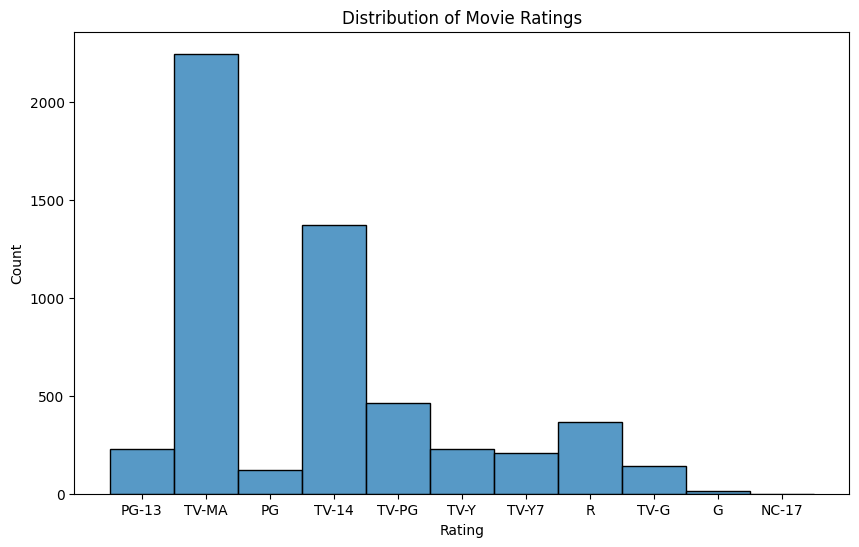

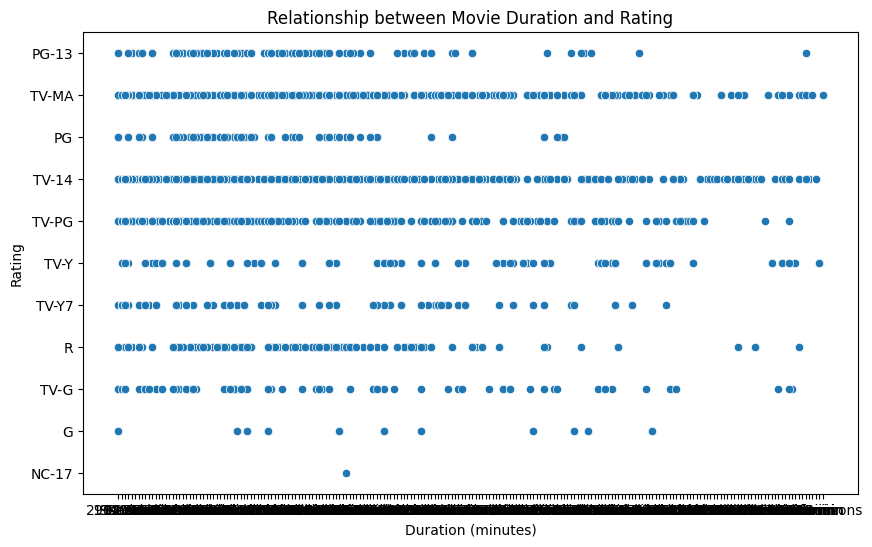

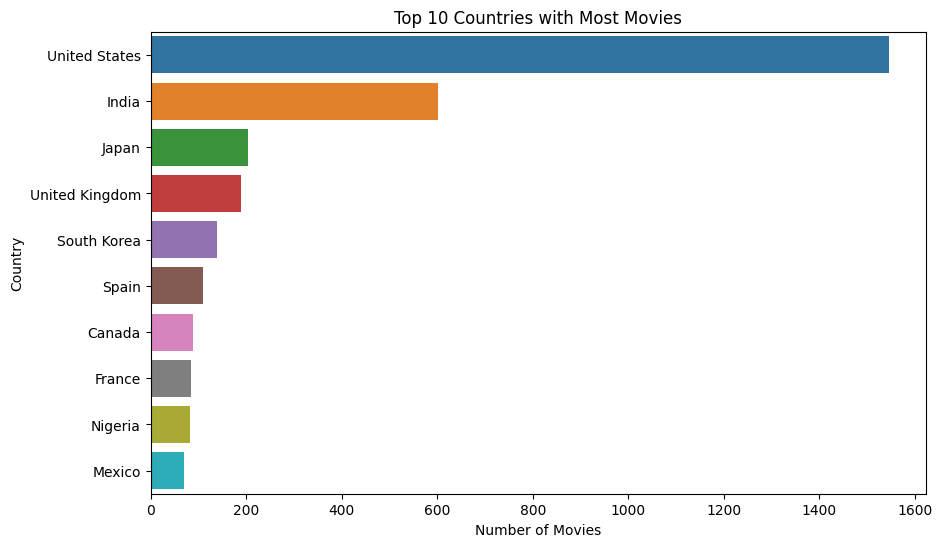

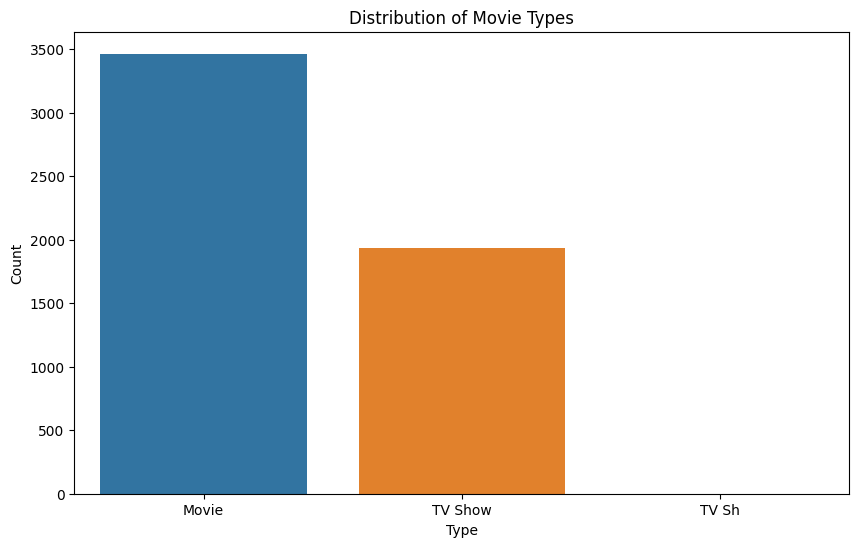

<ipython-input-91-149c24af355c>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=movies, x='type', y='rating', ci=None, estimator=np.mean)


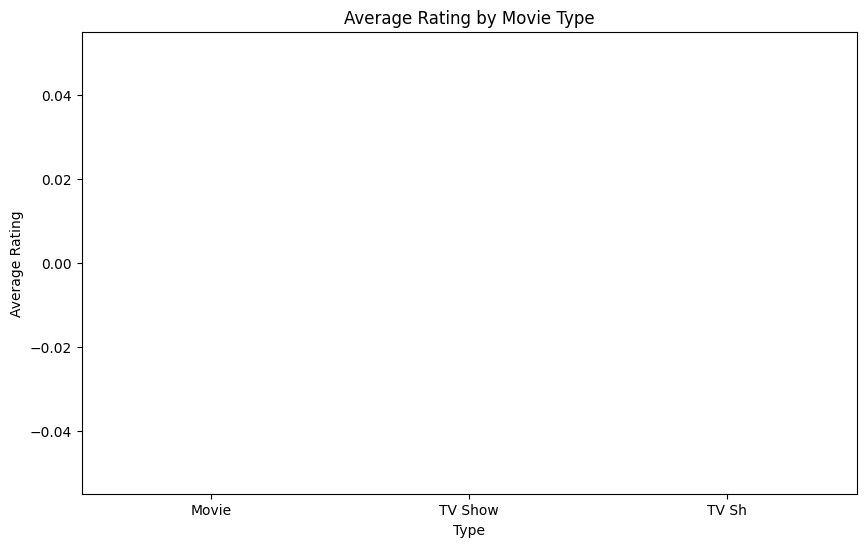

In [91]:
# Load the cleaned dataset
movies = pd.read_csv('movies_cleaned.csv')

# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies['rating'])
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Relationship between movie duration and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='duration', y='rating')
plt.title('Relationship between Movie Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

# Top 10 countries with most movies
top_countries = movies['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries, y=top_countries.index)
plt.title('Top 10 Countries with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

# Distribution of movie types
plt.figure(figsize=(10, 6))
sns.countplot(data=movies, x='type')
plt.title('Distribution of Movie Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Convert rating column to numeric type
movies['rating'] = pd.to_numeric(movies['rating'], errors='coerce')

# Average rating by movie type
plt.figure(figsize=(10, 6))
sns.barplot(data=movies, x='type', y='rating', ci=None, estimator=np.mean)
plt.title('Average Rating by Movie Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

In [92]:


# Drop unnecessary columns
movies_df.drop(['show_id', 'description'], axis=1, inplace=True)

# Convert duration to integer
movies_df['duration'] = movies_df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)

# Remove rows with missing values
movies_df.dropna(inplace=True)

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['release_year', 'duration']
movies_df[num_cols] = scaler.fit_transform(movies_df[num_cols])

# One-hot encode categorical columns
cat_cols = ['type', 'rating', 'country']
movies_df = pd.get_dummies(movies_df, columns=cat_cols)

# Save preprocessed dataset
movies_df.to_csv('movies_preprocessed.csv', index=False)

In [93]:
movies_df.columns

Index(['title', 'director', 'cast', 'date_added', 'release_year', 'duration',
       'listed_in', 'type_Movie', 'type_TV Show', 'rating_G',
       ...
       'country_United States, United Kingdom, Japan',
       'country_United States, United Kingdom, New Zealand', 'country_Uruguay',
       'country_Uruguay, Argentina',
       'country_Uruguay, Argentina, Germany, Spain',
       'country_Uruguay, Argentina, Spain', 'country_Uruguay, Guatemala',
       'country_Uruguay, Spain, Mexico', 'country_Vietnam',
       'country_Zimbabwe'],
      dtype='object', length=399)

In [94]:

# Load preprocessed data
movies_df = pd.read_csv('movies_preprocessed.csv')


# Encode categorical variables
le = LabelEncoder()
movies_df['type_Movie'] = le.fit_transform(movies_df['type_Movie'])
movies_df['rating_G'] = le.fit_transform(movies_df['rating_G'])
movies_df['director'] = le.fit_transform(movies_df['director'].astype(str))
# Convert categorical columns into numerical values
ct = ColumnTransformer(transformers=[('cast', OneHotEncoder(), ['cast'])], remainder='passthrough')
X = ct.fit_transform(X)

# Convert 'title' column to numeric values
movies_df['title'] = le.fit_transform(movies_df['title'])

# Split data into X and y
X = movies_df.drop(['rating_G'], axis=1)
y = movies_df['rating_G']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)


ValueError: ignored